In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath="/content/drive/My Drive/Colab Notebooks/Geospatialdataset.csv"
df=pd.read_csv(filepath)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_log,geometry
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.008099,POINT (174.7761 -41.2865)
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.989578,POINT (103.8198 1.3521)
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.936639,POINT (-90.1994 38.627)
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.816242,POINT (54.3667 24.4667)
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.248354,POINT (115.8603 -31.9523)


In [ ]:
df['geometry'].unique()

array(['POINT (174.7761 -41.2865)', 'POINT (103.8198 1.3521)',
       'POINT (-90.1994 38.627)', 'POINT (54.3667 24.4667)',
       'POINT (115.8603 -31.9523)', 'POINT (88.3639 22.5726)',
       'POINT (-83.0458 42.3314)', 'POINT (2.3522 48.8566)',
       'POINT (4.8952 52.3702)', 'POINT (-97.7431 30.2672)',
       'POINT (126.9777 37.5665)', 'POINT (-79.3832 43.6532)',
       'POINT (-104.9903 39.7392)', 'POINT (147.3271 -42.8826)',
       'POINT (-122.3321 47.6067)', 'POINT (-122.4194 37.7749)',
       'POINT (138.5997 -34.9285)', 'POINT (-87.6298 41.8781)',
       'POINT (55.2708 25.2048)', 'POINT (100.5014 13.7563)',
       'POINT (-71.0589 42.3601)', 'POINT (-95.3632 29.7633)',
       'POINT (-81.6954 41.4993)', 'POINT (13.405 52.52)',
       'POINT (-122.6755 45.5236)', 'POINT (-58.3816 -34.6037)',
       'POINT (144.9631 -37.8144)', 'POINT (51.5342 25.2617)',
       'POINT (-106.4833 31.7586)', 'POINT (-80.1918 25.7617)',
       'POINT (46.6743 24.6863)', 'POINT (47.9803 29.3656)

**Label Encoding of Coordinates**



In [ ]:


# Function to extract longitude and latitude
def extract_coordinates(point):
    # Remove 'POINT(' and ')' from the string
    point = point.replace('POINT (', '').replace(')', '')
    # Split the string by space and convert to float
    longitude, latitude = map(float, point.split())
    return longitude, latitude

# Apply the function to 'Coordinates' column and create 'Longitude' and 'Latitude' columns
df[['Longitude', 'Latitude']] = df['geometry'].apply(lambda x: pd.Series(extract_coordinates(x)))

# Display the DataFrame
print(df)


            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V25       V26  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.12853

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,Amount_log,geometry,Longitude,Latitude
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.008099,POINT (174.7761 -41.2865),174.7761,-41.2865
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.989578,POINT (103.8198 1.3521),103.8198,1.3521
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.936639,POINT (-90.1994 38.627),-90.1994,38.6270
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.816242,POINT (54.3667 24.4667),54.3667,24.4667
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.248354,POINT (115.8603 -31.9523),115.8603,-31.9523


In [ ]:
df['geometry'].value_counts()

geometry
POINT (138.5997 -34.9285)    3578
POINT (2.1734 41.3851)       3560
POINT (-122.4194 37.7749)    3534
POINT (29.9136 31.2056)      3526
POINT (114.1095 22.3964)     3526
                             ... 
POINT (-73.5673 45.5017)     3323
POINT (101.6885 3.1458)      3323
POINT (121.4737 31.2304)     3322
POINT (-122.3321 47.6067)    3311
POINT (-58.3816 -34.6037)    3236
Name: count, Length: 83, dtype: int64

 Grouping the data by the unique elements in the geometry column, then counting the number of entries in the Class column that are 0 and 1 for each group, and finally resetting the index and renaming the columns.

In [ ]:
grouped_data = df.groupby('geometry')['Class'].value_counts().reset_index(name='count')
grouped_data = grouped_data.sort_values('count', ascending=False).sort_values('Class', ascending=True)



In [ ]:
grouped_data.head()

,geometry,Class,count
114,POINT (138.5997 -34.9285),0,3572
38,POINT (-75.1652 39.9526),0,3388
154,POINT (54.3667 24.4667),0,3391
40,POINT (-76.6122 39.2904),0,3391
58,POINT (-83.0458 42.3314),0,3392


In [ ]:
grouped_data.tail()

,geometry,Class,count
65,POINT (-86.7817 36.1627),1,7
51,POINT (-81.6557 30.3321),1,7
43,POINT (-77.0365 38.8951),1,7
161,POINT (72.8777 19.076),1,7
129,POINT (174.7761 -41.2865),1,1


In [ ]:
normal_data=grouped_data[grouped_data['Class']==0]

In [ ]:
normal_data

,geometry,Class,count
114,POINT (138.5997 -34.9285),0,3572
38,POINT (-75.1652 39.9526),0,3388
154,POINT (54.3667 24.4667),0,3391
40,POINT (-76.6122 39.2904),0,3391
58,POINT (-83.0458 42.3314),0,3392
...,...,...,...
146,POINT (46.6743 24.6863),0,3464
44,POINT (-79.3832 43.6532),0,3464
122,POINT (151.2099 -33.8651),0,3464
124,POINT (153.0251 -27.4705),0,3466


In [ ]:
normal_data['rank'] = range(1, len(normal_data) + 1)

<ipython-input-57-eb5c9b3be3f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_data['rank'] = range(1, len(normal_data) + 1)


In [ ]:
normal_data.head()

,geometry,Class,count,rank
114,POINT (138.5997 -34.9285),0,3572,1
38,POINT (-75.1652 39.9526),0,3388,2
154,POINT (54.3667 24.4667),0,3391,3
40,POINT (-76.6122 39.2904),0,3391,4
58,POINT (-83.0458 42.3314),0,3392,5


In [ ]:
geometry_dict=dict(zip(normal_data['geometry'], normal_data['rank']))

In [ ]:
geometry_dict

{'POINT (138.5997 -34.9285)': 1,
 'POINT (-75.1652 39.9526)': 2,
 'POINT (54.3667 24.4667)': 3,
 'POINT (-76.6122 39.2904)': 4,
 'POINT (-83.0458 42.3314)': 5,
 'POINT (50.5837 26.2461)': 6,
 'POINT (13.405 52.52)': 7,
 'POINT (-117.1611 32.7157)': 8,
 'POINT (-77.0365 38.8951)': 9,
 'POINT (77.209 28.6139)': 10,
 'POINT (51.5342 25.2617)': 11,
 'POINT (-121.8863 37.3382)': 12,
 'POINT (-81.6557 30.3321)': 13,
 'POINT (-95.3632 29.7633)': 14,
 'POINT (174.7761 -41.2865)': 15,
 'POINT (-74.006 40.7128)': 16,
 'POINT (-93.2649 44.9778)': 17,
 'POINT (-104.9903 39.7392)': 18,
 'POINT (-97.3224 32.7557)': 19,
 'POINT (39.1719 21.4639)': 20,
 'POINT (-98.4936 29.4241)': 21,
 'POINT (-82.4626 27.9507)': 22,
 'POINT (-122.3321 47.6067)': 23,
 'POINT (31.2491 30.0563)': 24,
 'POINT (-73.5673 45.5017)': 25,
 'POINT (121.4737 31.2304)': 26,
 'POINT (101.6885 3.1458)': 27,
 'POINT (116.3974 39.9042)': 28,
 'POINT (174.7631 -36.8487)': 29,
 'POINT (88.3639 22.5726)': 30,
 'POINT (-99.1332 19.4326)

In [ ]:
df['geometry']=df['geometry'].map(geometry_dict)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,Amount_log,geometry,Longitude,Latitude
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.008099,15,174.7761,-41.2865
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.989578,38,103.8198,1.3521
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.936639,64,-90.1994,38.6270
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.816242,3,54.3667,24.4667
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.248354,50,115.8603,-31.9523


In [ ]:
df.drop('Longitude',axis=1,inplace=True)
df.drop('Latitude',axis=1,inplace=True)

In [ ]:
df['Output']=df['Class']

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Amount_log,geometry,Output
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.008099,15,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.989578,38,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.936639,64,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.816242,3,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.248354,50,0


In [ ]:
df.drop('Class',axis=1, inplace=True)

**Splitting the data**

x contains all the independent features while y contains the dependent feature 'Output'

In [ ]:
x=df.drop('Output',axis=1)
y=df['Output']

Splitting the train and test data in ratio 75:25

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
x_train.shape

(213605, 32)

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_test.shape

(71202, 32)

**Plotting Histograms for all features**


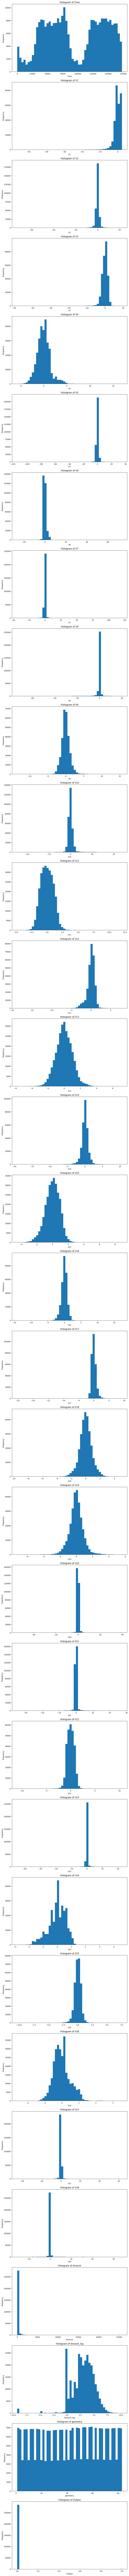

In [ ]:



# Create a figure with subplots for each feature
fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, 6*len(df.columns)))

# Loop through each feature and plot the histogram
for i, column in enumerate(df.columns):
    axs[i].hist(df[column], bins=50)
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

We observed that most of the features in our dataset follow standard normal distribution.

<Axes: ylabel='Time'>

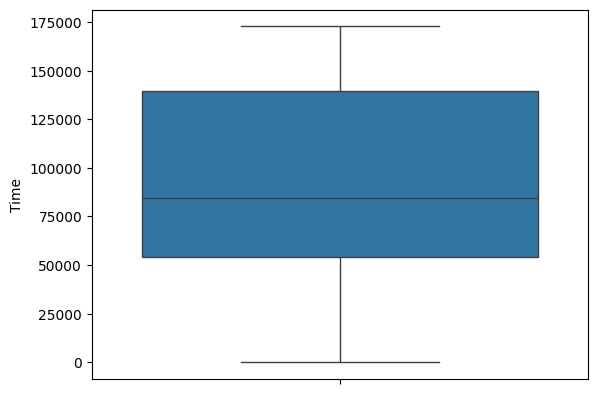

In [ ]:
sns.boxplot(df['Time'])

<Axes: ylabel='V1'>

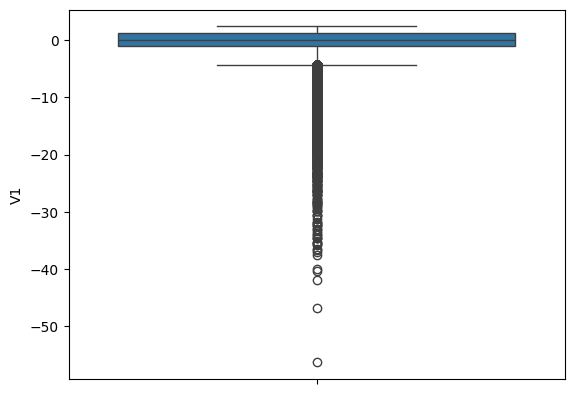

In [ ]:
sns.boxplot(df['V1'])

<Axes: ylabel='V2'>

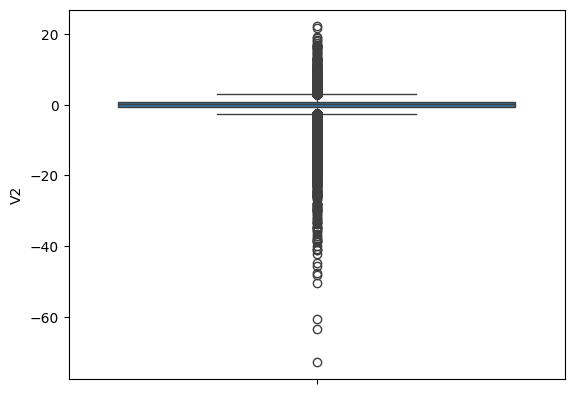

In [ ]:
sns.boxplot(df['V2'])

<Axes: ylabel='V3'>

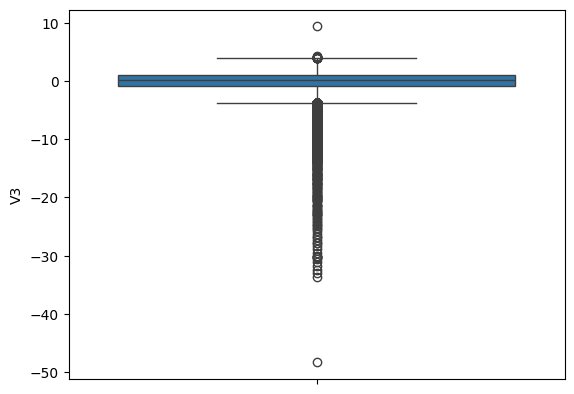

In [ ]:
sns.boxplot(df['V3'])

<Axes: ylabel='V4'>

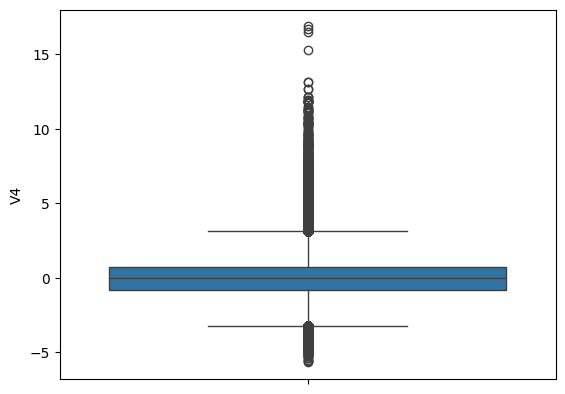

In [ ]:
sns.boxplot(df['V4'])

<Axes: ylabel='V5'>

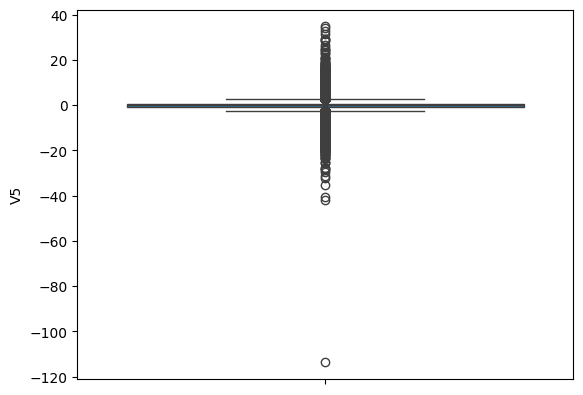

In [ ]:
sns.boxplot(df['V5'])

<Axes: ylabel='V6'>

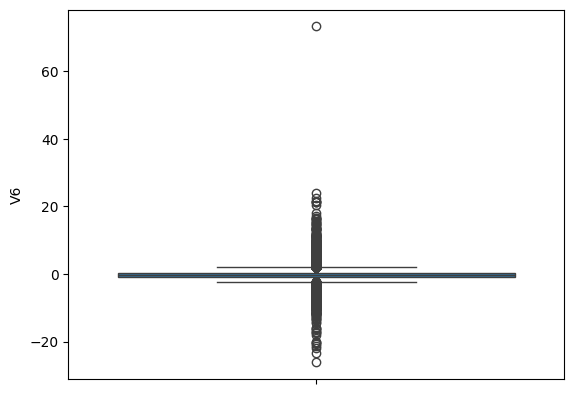

In [ ]:
sns.boxplot(df['V6'])

<Axes: ylabel='V7'>

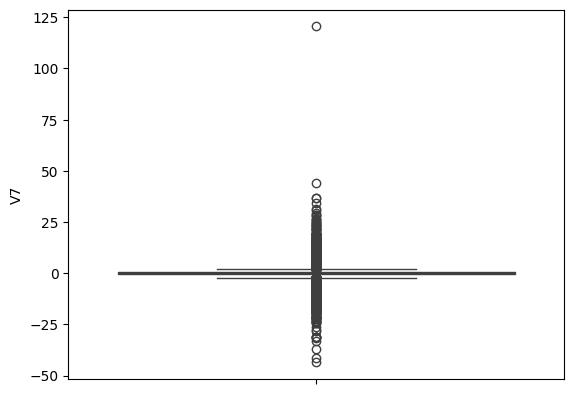

In [ ]:
sns.boxplot(df['V7'])

<Axes: ylabel='V8'>

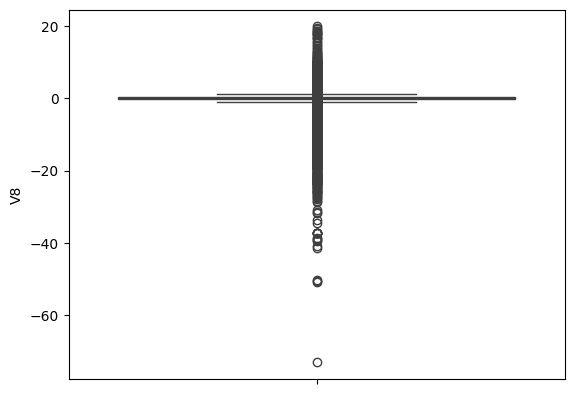

In [ ]:
sns.boxplot(df['V8'])

<Axes: ylabel='Amount'>

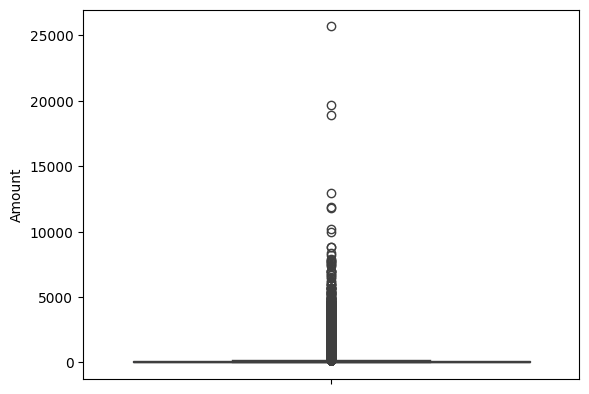

In [ ]:
sns.boxplot(df['Amount'])

So we observe that almost all the features in our dataset have outliers.

Most of the features in the dataset are following a standard normal distribution, but many of them have outliers,so we prefer to use the scaling method that is robust to outliers and so we use the **RobustScaler**

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Our dataset is highly imbalanced dataset as it has a high number of records with output class 0 than records with output class 1.
So to balance the number of records of fraud and legitimate transactions in our dataset we use the **SMOTE(Synthetic Minority Oversampling)**.


In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(y_train))

smt = SMOTE(random_state=42)
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smt))

Original dataset shape Counter({0: 213226, 1: 379})
Resampled dataset shape Counter({0: 213226, 1: 213226})


**Feature Scaling**

In [ ]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if((corr_matrix.iloc[i,j]))>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)

  return col_corr


In [ ]:
x_train_smt=pd.DataFrame(x_train_smt)

<Axes: >

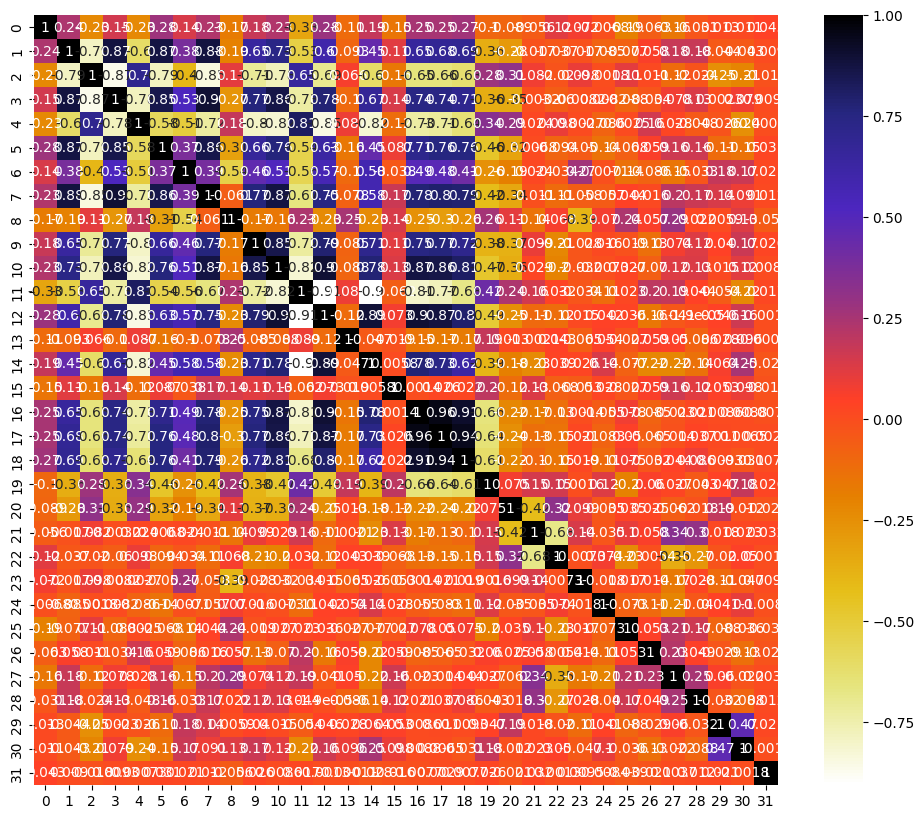

In [ ]:
#Using the Pearson Correlation
import seaborn as sns
plt.figure(figsize=(12,10))
corr=x_train_smt.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)

In [ ]:
corr_features=correlation(x_train_smt,0.9)

In [ ]:
corr_features

{16, 17, 18}

In [ ]:
x.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Amount_log', 'geometry'],
      dtype='object')

In [ ]:
for i in corr_features:
  print(x.columns[i])

V16
V17
V18


The features V16,V17,V18 are highly correlated and so we can remove them.

In [ ]:
df.drop(['V16','V17','V18'],axis=1, inplace=True)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Amount_log,geometry,Output
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,5.008099,15,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.989578,38,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,5.936639,64,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,4.816242,3,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,4.248354,50,0


In [ ]:
filepath="/content/drive/My Drive/Colab Notebooks/finaldataset.csv"
df.to_csv(filepath,index=False)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
filepath="/content/drive/My Drive/Colab Notebooks/finaldataset.csv"
df=pd.read_csv(filepath)

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Amount_log', 'geometry',
       'Output'],
      dtype='object')

In [8]:
x=df.drop('Output',axis=1)
y=df['Output']

Splitting the train and test data in ratio 75:25

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
type(x)

pandas.core.frame.DataFrame

In [10]:
x_train.shape

(213605, 29)

In [ ]:
type(x_train)

numpy.ndarray

In [11]:
x_test.shape

(71202, 29)

Most of the features in the dataset are following a standard normal distribution, but many of them have outliers,so we prefer to use the scaling method that is robust to outliers and so we use the **RobustScaler**

In [12]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Our dataset is highly imbalanced dataset as it has a high number of records with output class 0 than records with output class 1.
So to balance the number of records of fraud and legitimate transactions in our dataset we use the **SMOTE(Synthetic Minority Oversampling)**.


In [13]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(y_train))

smt = SMOTE(random_state=42)
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smt))

Original dataset shape Counter({0: 213226, 1: 379})
Resampled dataset shape Counter({0: 213226, 1: 213226})


**Modelling**


We are first defining a function for plotting roc curve with parameters false positive rate and true positive rate

In [14]:
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

Defining the function which will train the given model with training data and then predict for the test data.

In [15]:
import time
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,classification_report,confusion_matrix,recall_score,f1_score,cohen_kappa_score,roc_curve

In [27]:
def run_model(model, x_train,y_train,x_test,y_test,verbose=True):
  t0=time.time()
  if verbose==False:
    model.fit(x_train,y_train,verbose=0)
  else:
    model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  roc_auc=roc_auc_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)
  coh_kappa=cohen_kappa_score(y_test,y_pred)
  time_taken=time.time()-t0
  print("Accuracy Score: {}".format(accuracy))
  print("Roc Auc Score: {}".format(roc_auc))
  print("F1 score: {}".format(f1))
  print("Cohen's Kappa: {}".format(coh_kappa))
  print("Time taken: {}".format(time_taken))
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  probs = model.predict_proba(x_test)
  probs = probs[:, 1]
  fper, tper, thresholds = roc_curve(y_test, probs)
  plot_roc_cur(fper, tper)

  return model,accuracy,roc_auc,f1,coh_kappa,time_taken

**Testing for Logistic Regression**

Accuracy Score: 0.9740737619729782
Roc Auc Score: 0.9472565674562001
F1 score: 0.10126582278481013
Cohen's Kappa: 0.09856200636440893
Time taken: 7.686503887176514
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71089
           1       0.05      0.92      0.10       113

    accuracy                           0.97     71202
   macro avg       0.53      0.95      0.54     71202
weighted avg       1.00      0.97      0.99     71202

[[69252  1837]
 [    9   104]]


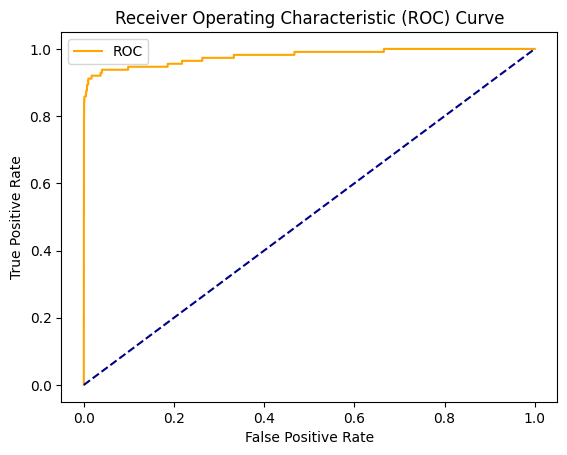

In [28]:
from sklearn.linear_model import LogisticRegression
params_lr={'penalty': 'l1', 'solver':'liblinear'}
model_lr=LogisticRegression(**params_lr)
model_lr, accu_lr, roc_auc_lr, f1_lr, coh_kappa_lr, time_lr=run_model(model_lr,x_train_smt,y_train_smt,x_test,y_test)

**Testing for KNN Classifier**

Accuracy Score: 0.99693828825033
Roc Auc Score: 0.9233650402331267
F1 score: 0.46829268292682924
Cohen's Kappa: 0.4670673300258762
Time taken: 206.73430681228638
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.32      0.85      0.47       113

    accuracy                           1.00     71202
   macro avg       0.66      0.92      0.73     71202
weighted avg       1.00      1.00      1.00     71202

[[70888   201]
 [   17    96]]


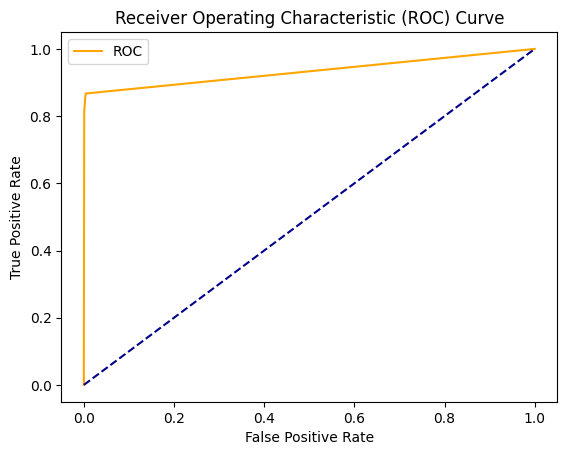

In [38]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier()
model_knn,accu_knn,roc_auc_knn,f1_knn,coh_kappa_knn,time_knn=run_model(model_knn,x_train_smt,y_train_smt,x_test,y_test)

**Testing Decision Tree**

Accuracy Score: 0.9933147945282436
Roc Auc Score: 0.8906261962289077
F1 score: 0.27217125382262997
Cohen's Kappa: 0.2702552041237244
Time taken: 7.791154623031616
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71089
           1       0.16      0.79      0.27       113

    accuracy                           0.99     71202
   macro avg       0.58      0.89      0.63     71202
weighted avg       1.00      0.99      1.00     71202

[[70637   452]
 [   24    89]]


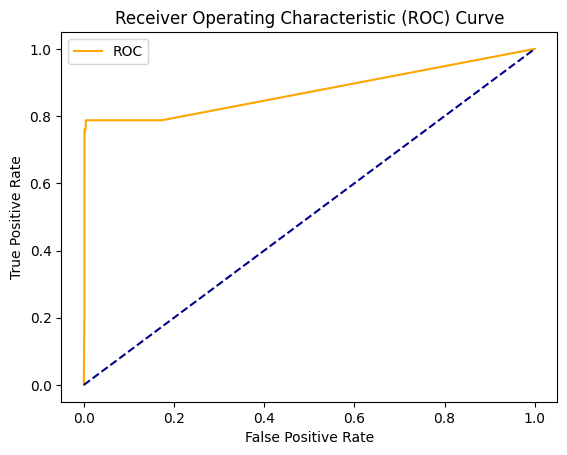

In [40]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accu_dt, roc_auc_dt, f1_dt,coh_kappa_dt, time_dt = run_model(model_dt, x_train_smt, y_train_smt, x_test, y_test)


**Testing Random Forest**

Accuracy Score: 0.9994943962248252
Roc Auc Score: 0.9113918897874121
F1 score: 0.8378378378378378
Cohen's Kappa: 0.8375847235589946
Time taken: 569.0468347072601
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.85      0.82      0.84       113

    accuracy                           1.00     71202
   macro avg       0.93      0.91      0.92     71202
weighted avg       1.00      1.00      1.00     71202

[[71073    16]
 [   20    93]]


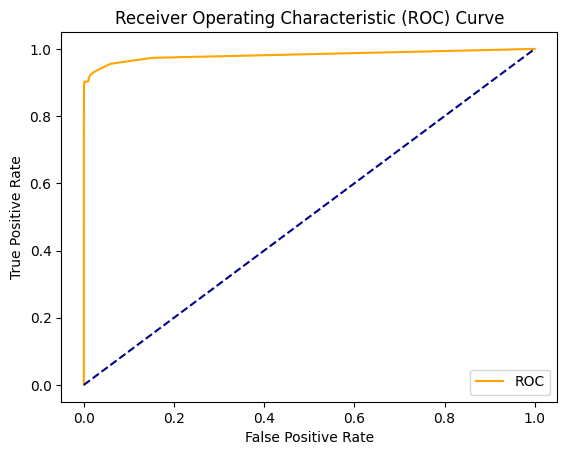

In [41]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf, accu_rf, roc_auc_rf, f1_rf,coh_kappa_rf, tt_rf = run_model(model_rf, x_train_smt, y_train_smt, x_test, y_test)


**Testing XGBoost**

Accuracy Score: 0.9991432824920649
Roc Auc Score: 0.9156337991875322
F1 score: 0.7550200803212852
Cohen's Kappa: 0.7545946388186792
Time taken: 6.642919301986694
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.69      0.83      0.76       113

    accuracy                           1.00     71202
   macro avg       0.85      0.92      0.88     71202
weighted avg       1.00      1.00      1.00     71202

[[71047    42]
 [   19    94]]


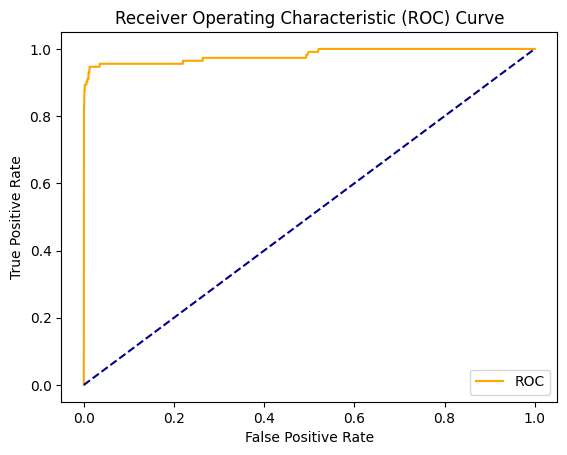

In [42]:
import xgboost as xgb
params_xgb ={'n_estimators': 20,
            'max_depth': 16}

model_xg= xgb.XGBClassifier(**params_xgb)
model_xg, accu_xg, roc_auc_xg, f1_xg,coh_kappa_xg, time_xg = run_model(model_xg, x_train_smt, y_train_smt, x_test, y_test)


**Testing Adaboost**

Accuracy Score: 0.9883851577202888
Roc Auc Score: 0.9500058943936286
F1 score: 0.1994191674733785
Cohen's Kappa: 0.19714962472737618
Time taken: 405.6418778896332
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71089
           1       0.11      0.91      0.20       113

    accuracy                           0.99     71202
   macro avg       0.56      0.95      0.60     71202
weighted avg       1.00      0.99      0.99     71202

[[70272   817]
 [   10   103]]


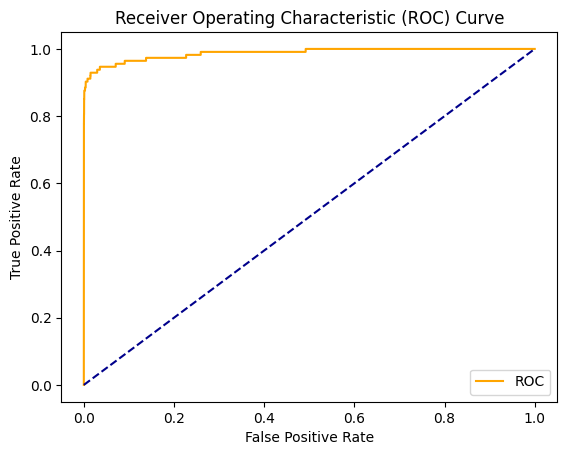

In [43]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                                  n_estimators=50,
                                  algorithm="SAMME.R",
                                  learning_rate=0.5)
model_ada, accu_ada, roc_auc_ada, f1_ada,coh_kappa_ada, time_ada = run_model(model_ada, x_train_smt, y_train_smt, x_test, y_test)


**Model Selection**

<ipython-input-46-957747c5dc53>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Time taken', data = model_data, palette='summer')


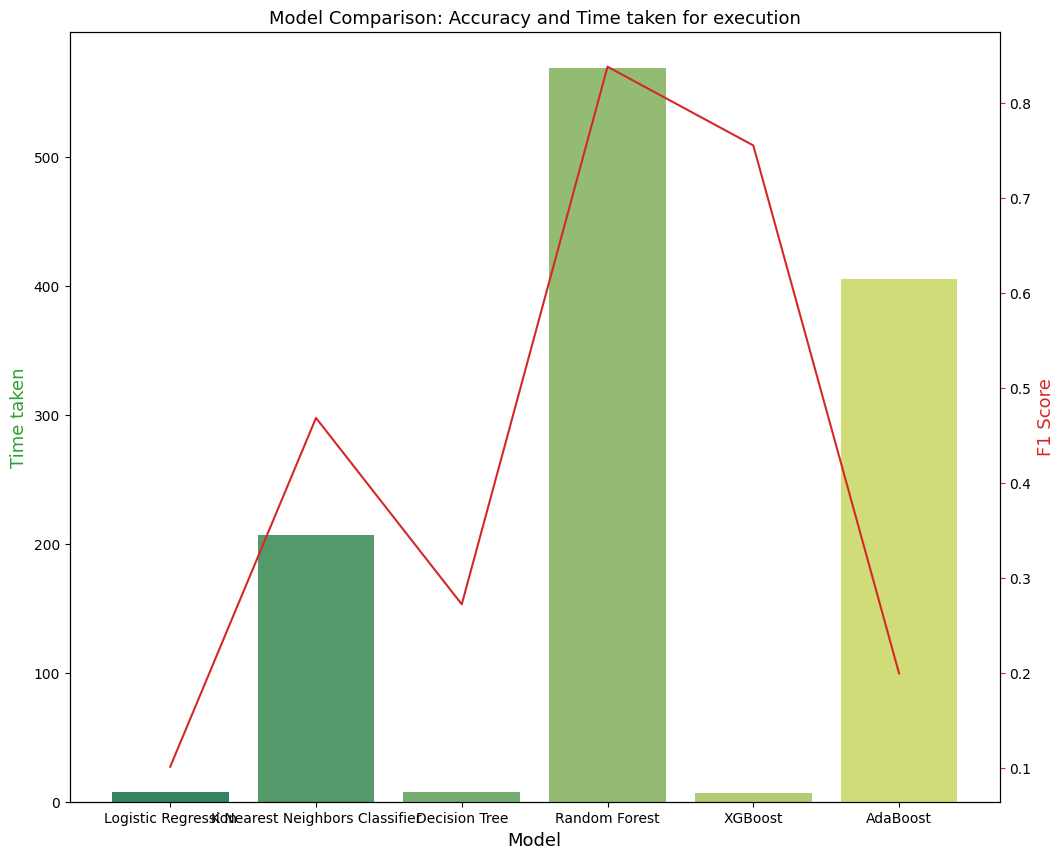

In [46]:
accuracies=[accu_lr , accu_knn, accu_dt, accu_rf,accu_xg , accu_ada]
roc_auc_scores=[roc_auc_lr, roc_auc_knn,roc_auc_dt, roc_auc_rf , roc_auc_xg, roc_auc_ada]
f1_scores=[f1_lr , f1_knn , f1_dt , f1_rf , f1_xg , f1_ada]
coh_kappa_scores=[coh_kappa_lr , coh_kappa_knn , coh_kappa_dt, coh_kappa_rf , coh_kappa_xg , coh_kappa_ada]
times=[time_lr, time_knn, time_dt , tt_rf , time_xg , time_ada]

model_data = {'Model': ['Logistic Regression','K Nearest Neighbors Classifier','Decision Tree','Random Forest','XGBoost', 'AdaBoost'],
              'Accuracy': accuracies,
              'ROC_AUC': roc_auc_scores,
              'F1 Score': f1_scores,
              'Cohen_Kappa': coh_kappa_scores,
              'Time taken': times}
model_data=pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = model_data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('F1 Score', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='F1 Score', data = model_data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)



The Random Forest gives the best F1 score results but the training time is long and computationally expensive and compared to it Xg Boost has a fairly good F1 score anf also take very less computation time for model training.

So the Model that we finally select for our purpose is **XgBoost**